# Enunciado de la pregunta:
En la imágen Aviones.jpg que encuentra en éste repo (y pública en la URL en la parte inferior). Utilice todo su conocimiento de procesamiento de imágenes para contar implementar un algoritmo que permita contar los aviones de la imágen.

# Estrategias para preparar la imágen para que se puedan contar los aviones



## Estrategia 1: Usar la erosión para recortar la imagen y luego sacar los bordes
Para poder contar los aviones, se utilizará la erosión ya que permite "recortar" elementos de la imagen. Una vez recortados los elementos, se pueden obtener los bordes de estos y así contarlos.

**Pasos de la Estrategia 1:**
1. Volver la imagen en una imagen binaria para poder realizar operaciones utilizando el método de otsu
2. Volver la imagen negativa para que los aviones estén de negro y al erosionarla estos crezcan mientras el blanco de la imagen (el paisaje) se "elimina"/disminuye
3. Erosionar la imagen para tener las figuras recortadas.
4. Restar la imagen original con la erosionada para poder tener sólo los aviones
5. Mostrar las imágenes.

- *Sobre la erosión:* operación morfológica que erosiona los elementos blancos de la imagen, ocasionando que incremente el negro y el blanco disminuya. Esto permite contar los objetos en las imágenes ya que los separa.
  - Una vez erosionada la imagen, ya no se puede volver a la original
  - Cuando se "recorta" la imagen, la imagen original se pierde. No se puede volver a la imagen original de la imagen recortada.
  - Puede limpiar el ruido en imágenes binarias
  - La cantidad a erosionar depende de la máscara de erosión.
  - Su operador es el signo "-" en un círculo


- *Sobre el Método de Otsu:* Es el umbral que permite binarizar una imagen
  - Permite encontrar el punto adecuado para convertir la imagen original en una binaria (sólo de blanco y negro)
  - Reduce el peso de la imagen ya que la información de sus canales de color sólo pueden ser 2 valores: 0 para blanco y 1 para negro.

- **Operación a realizar:** A - (A - B)

## Estrategia 2: Regiones de la imagen
Utilizando las operaciones morfológicas de la erosión y la dilación, se pueden obtener las regiones de la imagen. En este caso, se intentará sacar los aviones como regiones para que de esta manera se puedan contar. La imagen final se mostraría en un mapa de calor para poder visualizar mejor los aviones.

**Pasos a realizar:**
1. Volver la imagen en una binaria para poder realizar operaciones utilizando el método de Otsu.
2. Erosionar la imagen para tener las figuras a identificar como regiones
3. Dilatar la imagen erosionada para tener el resto de la imagen y al realizar la resta tener las regiones.
4. Restar la imagen erosionada con la imagen dilatada
5. Mostrar la imagen final en un mapa de calor para que se puedan visualizar mejor los aviones. 

- *Sobre la dilación:* operación morfológica que dilata los elementos blancos de la imagen, como consecuencia el blanco aumenta y el negro disminuye.
  - Se podría entender como que el blanco erosiona al negro.
  - Su operador es el signo "+" en un círculo.

- **Operación a realizar:** (A - B) -- (A + B)
  - "--" = signo resta
  - "-" = signo erosión, como no se puede poner en un círculo es que se pone así

# Código


In [ ]:
#Librerías a importar 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from scipy.ndimage.morphology import binary_erosion, binary_dilation
from scipy.ndimage.morphology import distance_transform_edt
from scipy.ndimage.morphology import binary_fill_holes, morphological_gradient

In [ ]:
#Cargar la imagen al notebook
base = "https://canaval.org/assets/Aviones.jpg"

img = "Aviones.jpg"
url = f"{base}"
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  165k  100  165k    0     0  5326k      0 --:--:-- --:--:-- --:--:-- 5326k


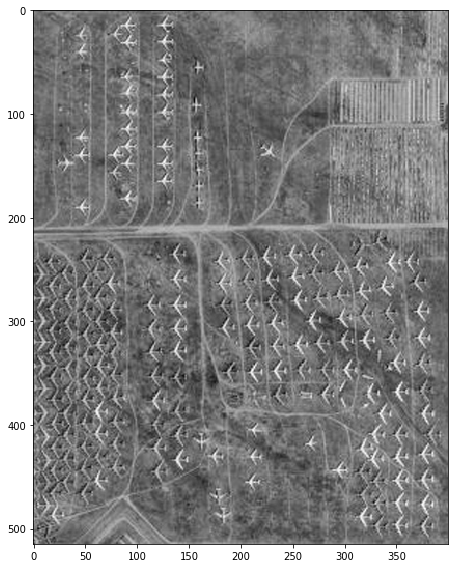

(515, 400, 3)


In [ ]:
#Mostrar la imagen original
def show(im, size=8):
  _, ax = plt.subplots(figsize=(size, size))
  ax.imshow(im, interpolation="nearest")
  plt.tight_layout()
  plt.show()

def loadImg(img):
  im = cv2.imread(img)
  return im[:,:,::-1]

aviones = loadImg("/content/Aviones.jpg")
show(aviones)
print(aviones.shape)

(515, 400)


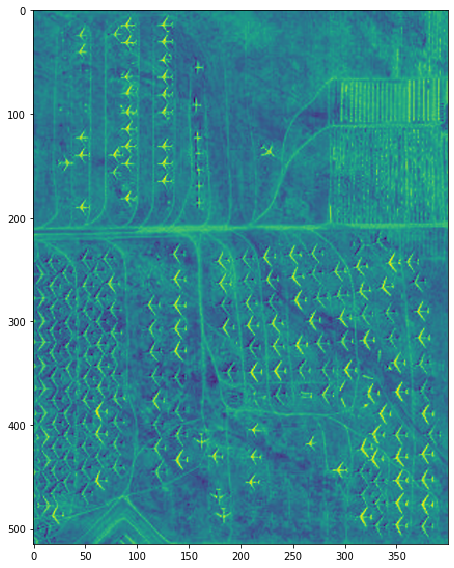

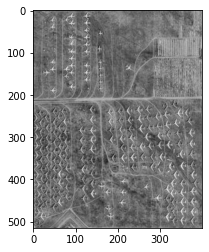

In [ ]:
#Transformar la imagen en un formato que se pueda trabajar y mostrarla nuevamente
aviones = cv2.cvtColor(aviones, cv2.COLOR_BGR2GRAY)
print(aviones.shape)
show(aviones)
plt.imshow(aviones, 'gray')

## Implementación de la Estrategia 1

(<matplotlib.image.AxesImage at 0x7efcd7a89790>, (-0.5, 399.5, 514.5, -0.5))

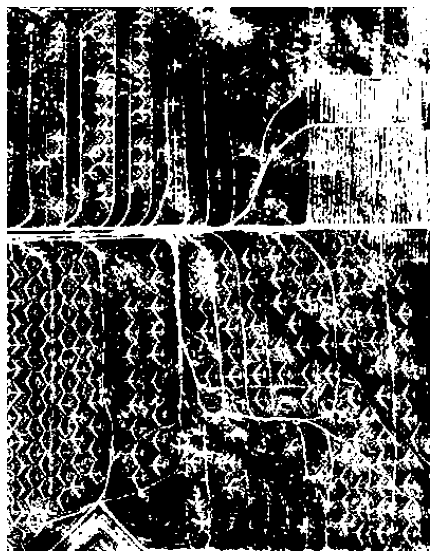

In [ ]:
#1. Volver la imagen binaria con el méodo de otsu
thres = threshold_otsu(aviones)
aviones = (aviones > thres).astype(np.uint8)

plt.subplots(figsize = (10,10))
plt.imshow(aviones, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7efcd7a3b750>, (-0.5, 399.5, 514.5, -0.5))

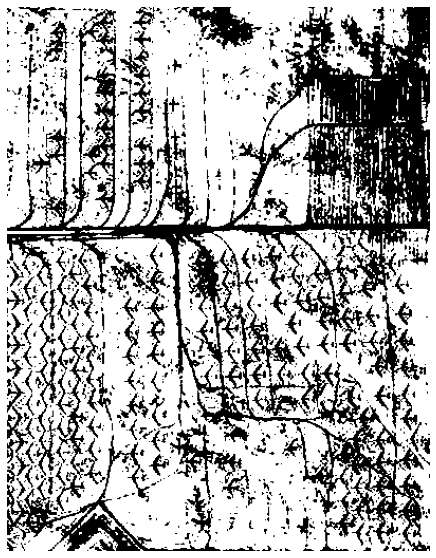

In [ ]:
#2.  Volver la imagen negativa
aviones_negativos = 1 - aviones

plt.subplots(figsize = (10,10))
plt.imshow(aviones_negativos, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7efcd79c1e50>, (-0.5, 399.5, 514.5, -0.5))

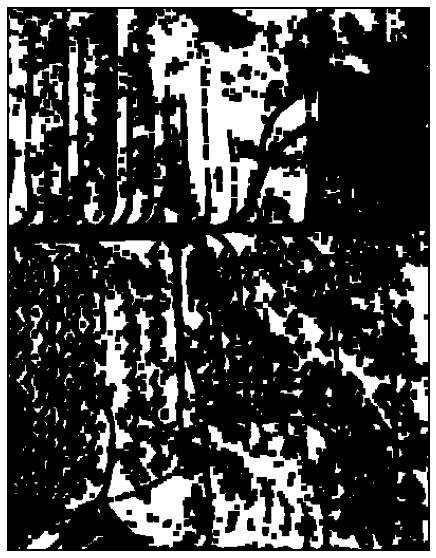

In [ ]:
#3. Erosionar la imagen negativa
aviones_erosionados = binary_erosion(aviones_negativos, structure=np.ones((5, 5)))
plt.subplots(figsize = (10,10))
plt.imshow(aviones_erosionados, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7efcd79246d0>, (-0.5, 399.5, 514.5, -0.5))

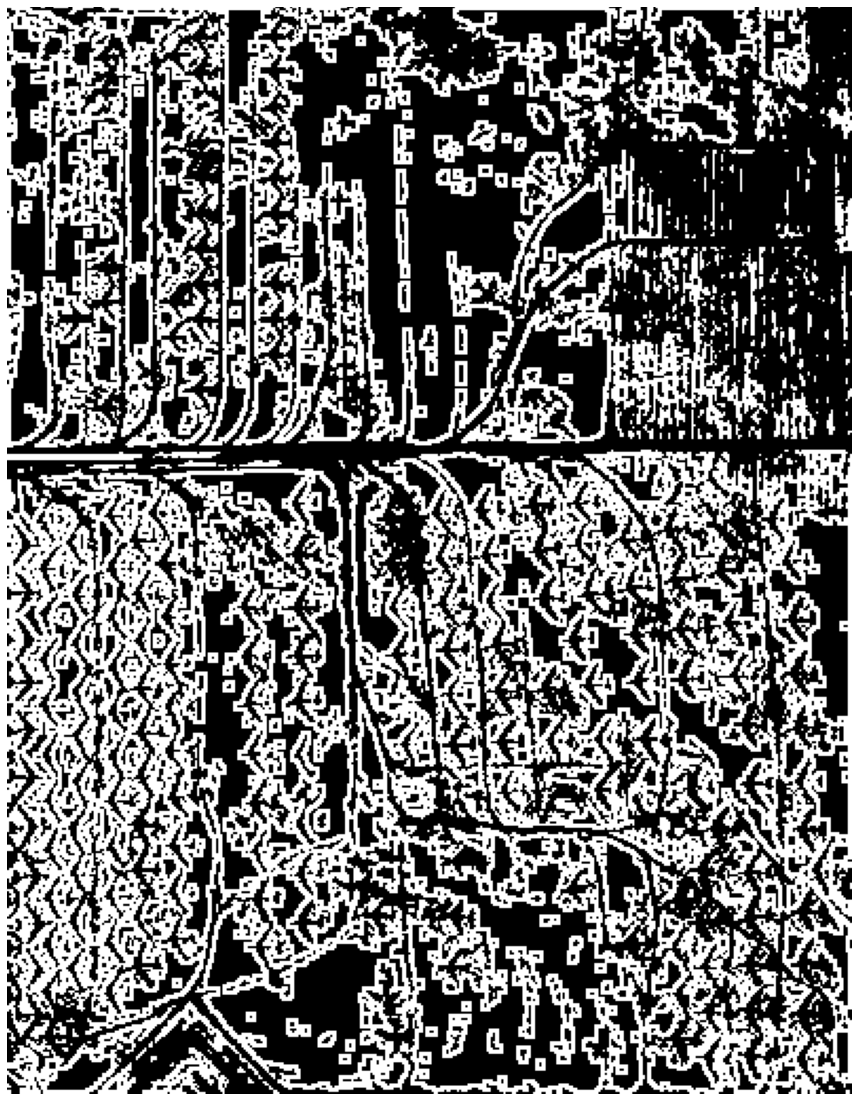

In [ ]:
#4. Restar la imagen original con la imagen erosionada para obtener los bordes de los aviones
aviones_contar = aviones_negativos - aviones_erosionados

plt.subplots(figsize = (20,20))
plt.imshow(aviones_contar, cmap='gray'), plt.axis('off')

## Implementación de la Estrategia 2

(<matplotlib.image.AxesImage at 0x7efcd7908a50>, (-0.5, 399.5, 514.5, -0.5))

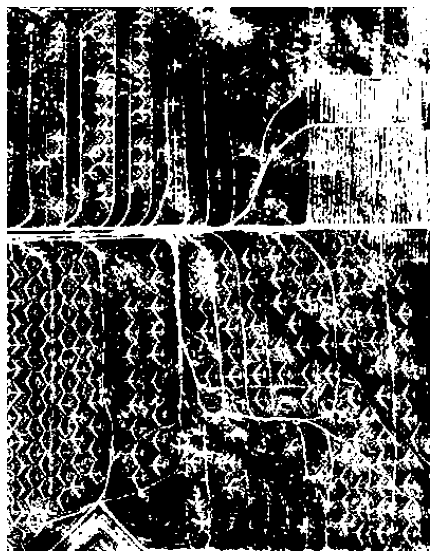

In [ ]:
#1. Volver la imagen binaria utilizando el método de Otsu
thres = threshold_otsu(aviones)
aviones = (aviones > thres).astype(np.uint8)

plt.subplots(figsize = (10,10))
plt.imshow(aviones, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7efcd707c7d0>, (-0.5, 399.5, 514.5, -0.5))

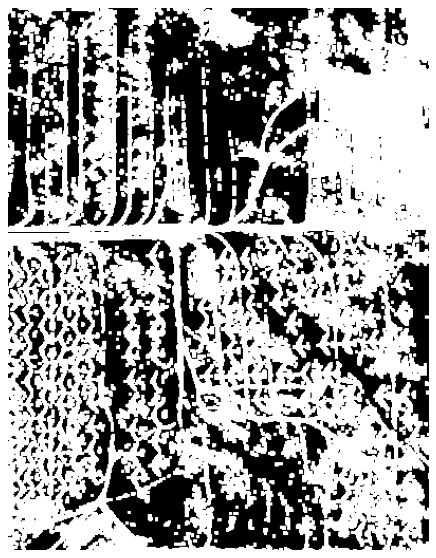

In [ ]:
#2. Erosionar la imagen
aviones_negativos = 1 - aviones
aviones_erosionados2 = binary_erosion(aviones_negativos, structure=np.ones((3, 3)))
aviones_erosionados2 = 1 - aviones_erosionados2


plt.subplots(figsize = (10,10))
plt.imshow(aviones_erosionados2, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7efcd7059690>, (-0.5, 399.5, 514.5, -0.5))

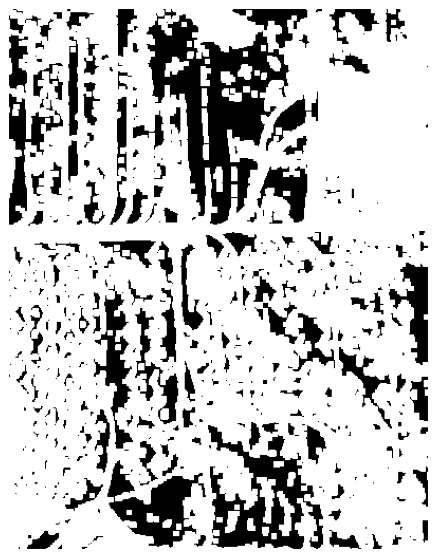

In [ ]:
#3. Dilatar la imagen erosionada
aviones_dilatados = binary_dilation(aviones_erosionados2, structure=np.ones((3, 3)))

plt.subplots(figsize = (10,10))
plt.imshow(aviones_dilatados, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7efcd6fa6f90>, (-0.5, 399.5, 514.5, -0.5))

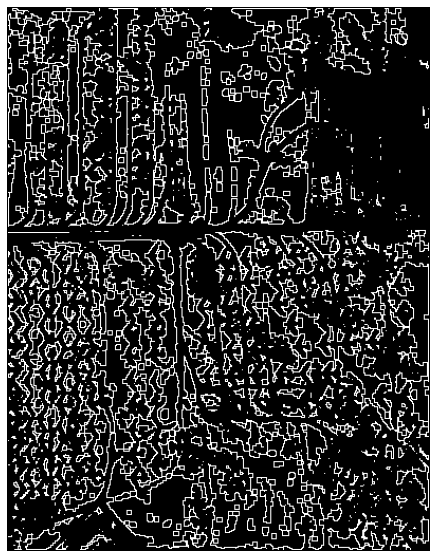

In [ ]:
#4. Restar la imagen erosionada con la imagen dilatada
aviones_regiones = np.clip(aviones_dilatados.astype(int) - aviones_erosionados2.astype(int), 0, 1)

plt.subplots(figsize = (10,10))
plt.imshow(aviones_regiones, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7efcd6f29d90>, (-0.5, 399.5, 514.5, -0.5))

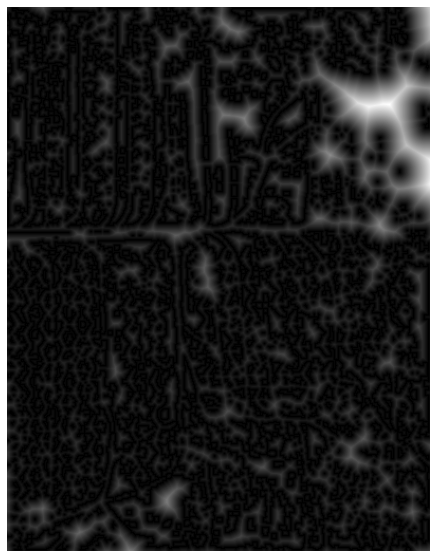

In [ ]:
#5. Mostrar los aviones en un mapa de calor
aviones_mapa_calor = distance_transform_edt(np.logical_not(aviones_regiones))

plt.subplots(figsize = (10,10))
plt.imshow(aviones_mapa_calor, cmap='gray'), plt.axis('off')

#Comparación de resultados de ambas estrategias:
Se explicarán cuál de las dos estrategias proporciona mejores resultados y por qué

Con la primera estrategia se pueden visualizar mejor los aviones ya que sólo depende de la erosión. En el caso de las regiones, esto serviría si no hubieran tantos elementos juntos al mismo tiempo ya que al dilatar luego de erosionar, pareciera que se unen. 